In [1]:
import pywt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

print(__doc__)

#Do not display warnings
import warnings
warnings.simplefilter('ignore')

# #Inline magic and style
%matplotlib inline
plt.style.use('seaborn-white')

Automatically created module for IPython interactive environment


In [2]:
data = pd.read_csv('C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B11-12P.csv')
# data = pd.read_csv('C:/Users/shunyinb/OneDrive - Cenovus Energy Inc/Project/09_Kedro/analytics_new/data/01_raw/01_SAGD/B01_P05.csv')
for i in range(1,len(data.columns)):
    data[data.columns[i]] = pd.to_numeric(data[data.columns[i]], errors='coerce') 

data = data.iloc[:,[0,1,3,4,5,6]]


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

data = data.dropna(axis=0)   # may change
data.columns

Index(['Injector Bottom Hole Pressure', 'Emulsion Pressure',
       'Producer Bottom Hole Pressure', 'ESP Current', 'ESP Speed'],
      dtype='object')

In [2]:
from sklearn.ensemble import RandomForestRegressor
regressor_1  = RandomForestRegressor(random_state=0)
regressor_1

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [171]:
input_names = ['Steam [m3/d]'] 
input_data = data[input_names]
input_data.head(1093)

,Steam [m3/d]
Date,
2013-08-24,245.0
2013-08-25,358.0
2013-08-26,428.0
2013-08-27,353.0
2013-08-28,424.0
...,...
2016-10-05,443.0
2016-10-06,277.0
2016-10-07,274.0


In [73]:
data.iloc[:2741]

,Timestep,Avg Oil [bbl/d],Avg Steam [m3/d],Avg Emulsion [m3/d],Avg Water [m3/d]
Timestep_Idx,,,,,
5,5,66.0,354.0,367.0,357.0
6,6,75.0,340.0,435.0,423.0
7,7,89.0,410.0,284.0,270.0
8,8,71.0,245.0,276.0,265.0
9,9,75.0,255.0,366.0,354.0
...,...,...,...,...,...
2975,2975,145.0,87.0,196.0,173.0
2976,2976,144.0,90.0,255.0,232.0
2977,2977,140.0,85.0,235.0,213.0


In [103]:
label = data.iloc[:,[2,3,1,4]]
label

,Steam [m3/d],Emulsion [m3/d],Oil [bbl/d],Avg Water [m3/d]
Date,,,,
2012-08-11,241.0,505.0,259.0,464.0
2012-08-12,400.0,493.0,261.0,452.0
2012-08-13,472.0,497.0,253.0,457.0
2012-08-14,391.0,498.0,253.0,457.0
2012-08-15,367.0,509.0,258.0,468.0
...,...,...,...,...
2019-10-12,102.0,259.0,558.0,170.0
2019-10-13,80.0,269.0,567.0,179.0
2019-10-14,78.0,270.0,576.0,178.0


In [6]:
data = data[['Date', 'Injector Bottom Hole Pressure', 'Steam Flow Rate - Outer', 
                                    'Bottom Hole Heel Temperature', 'Emulsion Pressure', 'Producer Bottom Hole Pressure', 
                                    'ESP Speed', 'ESP Current', 'Emulsion Flow Rate']]


data_daily = data[['Injector Bottom Hole Pressure', 'Bottom Hole Heel Temperature', 'Emulsion Pressure', 
                   'Producer Bottom Hole Pressure', 'ESP Current', 'ESP Speed', 'Emulsion Flow Rate',
                  'Steam Flow Rate - Outer']]

# data_rollingmedianfill = data.fillna(data.rolling(30, min_periods=1).median())
# data_rollingmedianfill = data_rollingmedianfill.fillna(data_rollingmedianfill.median())
# data = data_rollingmedianfill.copy()

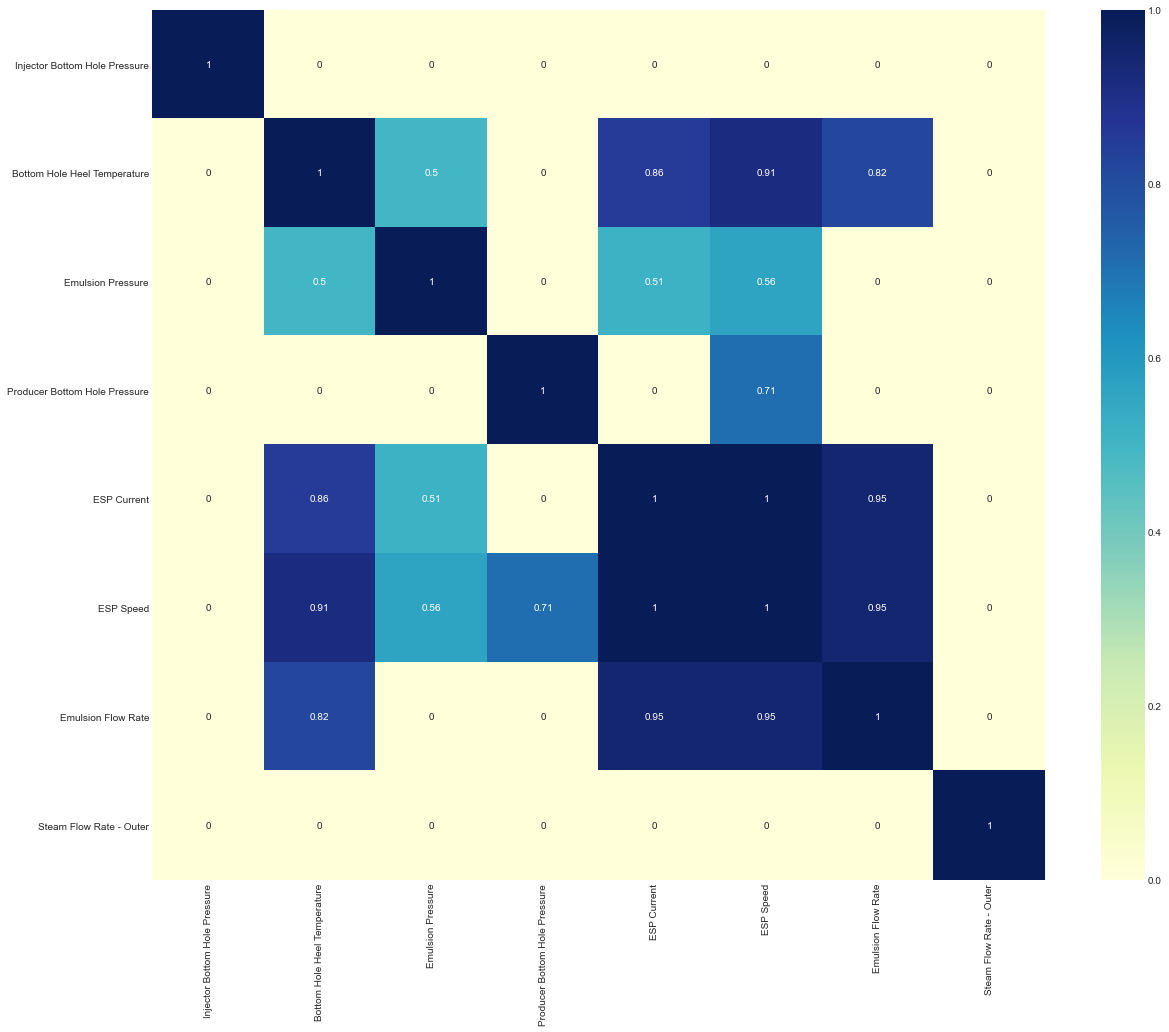

In [7]:
plt.figure(figsize=(20,16))
corr_matrix = data_daily.corr()
corr_matrix[np.abs(corr_matrix) < 0.4] = 0
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [88]:
weekly = data.resample('7D').mean()
weekly

,Injector Bottom Hole Pressure,Steam Flow Rate - Outer,Bottom Hole Heel Temperature,Emulsion Pressure,Producer Bottom Hole Pressure,ESP Speed,Emulsion Flow Rate
Date,,,,,,,
2011-03-02,1878.420131,159.326967,131.949657,1078.925677,645.126796,0.0,233.486073
2011-03-09,2031.914167,143.221134,142.074831,2066.259905,1339.362723,0.0,198.104684
2011-03-16,2181.106131,190.558232,144.561632,2181.701555,623.755506,0.0,264.646412
2011-03-23,2194.417027,138.462061,145.965740,2188.581264,389.907109,0.0,323.232618
2011-03-30,2192.206962,103.031512,147.005186,2178.338972,885.736450,0.0,348.585253
...,...,...,...,...,...,...,...
2014-11-26,2591.686524,61.145129,64.465302,846.790362,59.812038,0.0,38.852210
2014-12-03,2923.126953,56.512224,64.503095,844.511797,57.869742,0.0,18.995579
2014-12-10,4192.294015,61.522318,64.229806,848.826233,66.940334,0.0,14.339889


In [89]:
data_rollingmedianfill = weekly.fillna(weekly.rolling(30, min_periods=1).median())
weekly_rollingmedianfill = data_rollingmedianfill.fillna(data_rollingmedianfill.median())
weekly_rollingmedianfill

,Injector Bottom Hole Pressure,Steam Flow Rate - Outer,Bottom Hole Heel Temperature,Emulsion Pressure,Producer Bottom Hole Pressure,ESP Speed,Emulsion Flow Rate
Date,,,,,,,
2011-03-02,1878.420131,159.326967,131.949657,1078.925677,645.126796,0.0,233.486073
2011-03-09,2031.914167,143.221134,142.074831,2066.259905,1339.362723,0.0,198.104684
2011-03-16,2181.106131,190.558232,144.561632,2181.701555,623.755506,0.0,264.646412
2011-03-23,2194.417027,138.462061,145.965740,2188.581264,389.907109,0.0,323.232618
2011-03-30,2192.206962,103.031512,147.005186,2178.338972,885.736450,0.0,348.585253
...,...,...,...,...,...,...,...
2014-11-26,2591.686524,61.145129,64.465302,846.790362,59.812038,0.0,38.852210
2014-12-03,2923.126953,56.512224,64.503095,844.511797,57.869742,0.0,18.995579
2014-12-10,4192.294015,61.522318,64.229806,848.826233,66.940334,0.0,14.339889


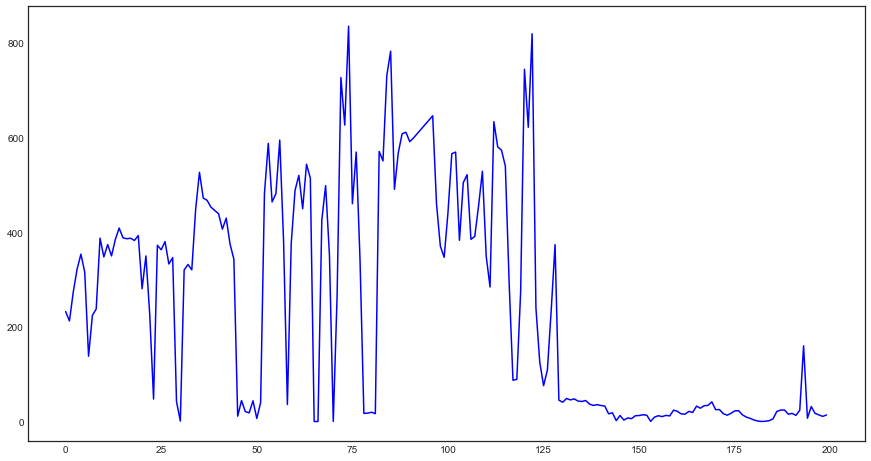

In [90]:
weekly_med = data.resample('7D').median()
monthly_med = data.resample('30D').median()
plt.figure(figsize=(15,8))
plt.plot(weekly_med["Emulsion Flow Rate"].values, "b", label = 'PBHP')
plt.show()

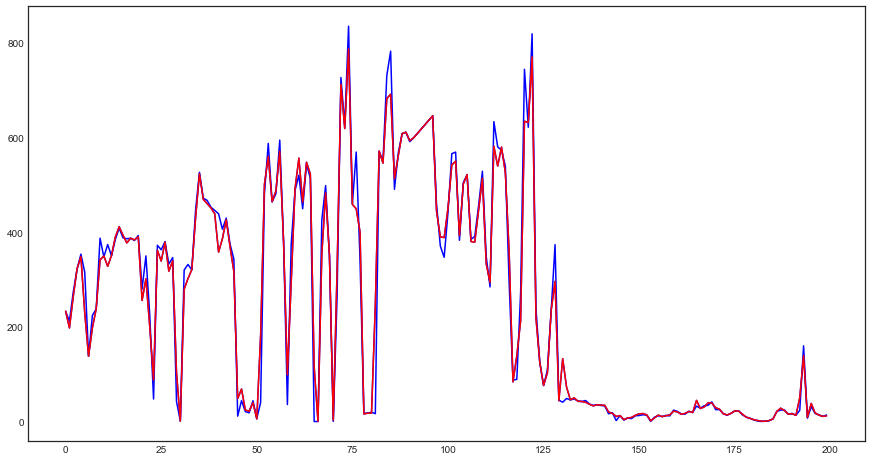

In [91]:
plt.figure(figsize=(15,8))
plt.plot(weekly["Emulsion Flow Rate"].values, "b", label = 'PBHP')
plt.plot(weekly_med["Emulsion Flow Rate"].values, "b", label = 'PBHP')
plt.plot(weekly_rollingmedianfill["Emulsion Flow Rate"].values, "r", label = 'PBHP')
plt.show()

In [79]:
monthly = data.resample('30D').mean()
data_rollingmedianfill = monthly.fillna(monthly.rolling(30, min_periods=1).median())
monthly_rollingmedianfill = data_rollingmedianfill.fillna(data_rollingmedianfill.median())
data_rollingmedianfill_med = monthly_med.fillna(monthly_med.rolling(30, min_periods=1).median())
monthly_rollingmedianfill_med = data_rollingmedianfill_med.fillna(data_rollingmedianfill_med.median())
monthly_rollingmedianfill

,Injector Bottom Hole Pressure,Steam Flow Rate - Outer,Bottom Hole Heel Temperature,Emulsion Pressure,Producer Bottom Hole Pressure,ESP Speed,Emulsion Flow Rate
Date,,,,,,,
2011-03-02,2082.728795,155.066130,144.409307,2167.020874,809.303739,0.0,262.452538
2011-04-01,2140.364819,77.759090,139.396227,1519.373604,479.504457,0.0,221.426476
2011-05-01,2050.988973,74.056512,144.044869,1853.234342,580.474802,0.0,332.092521
2011-05-31,2136.666919,178.602671,146.224639,1883.535221,485.136455,0.0,390.927039
2011-06-30,2186.988737,211.460118,141.922539,1876.439315,616.323411,0.0,341.287023
...,...,...,...,...,...,...,...
2019-11-15,2620.175757,16.439905,33.481703,0.000000,117.652761,0.0,38.134584
2019-12-15,2629.185466,15.126572,33.303787,0.000000,117.561831,0.0,48.202307
2020-01-14,2018.350027,12.434246,33.190393,0.000000,80.750813,0.0,89.274768


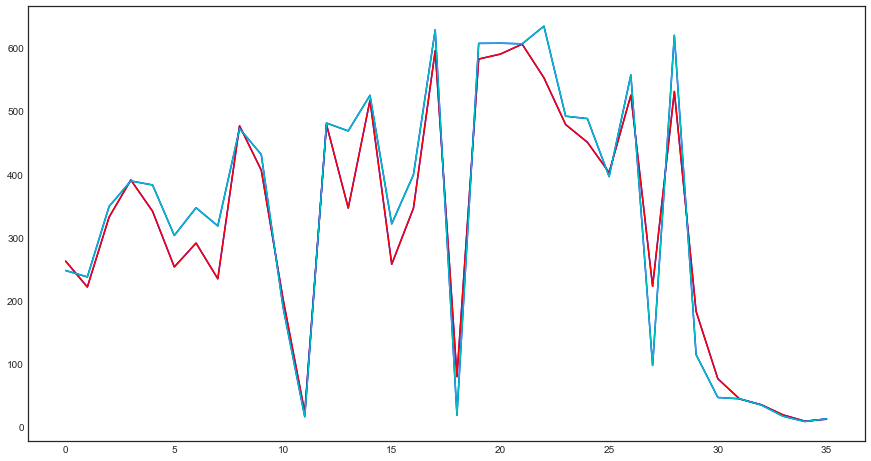

In [92]:
plt.figure(figsize=(15,8))
plt.plot(monthly["Emulsion Flow Rate"].values[:36], "b", label = 'PBHP')
plt.plot(monthly_rollingmedianfill["Emulsion Flow Rate"].values[:36], "r", label = 'PBHP')
plt.plot(monthly_med["Emulsion Flow Rate"].values[:36], "b", label = 'PBHP')
plt.plot(monthly_rollingmedianfill_med["Emulsion Flow Rate"].values[:36], "c", label = 'PBHP')
plt.show()

In [35]:
monthly_ = data.resample('7D').mean()
monthly_.interpolate(method='spline', order=2)
monthly_.head(10)

,Injector Bottom Hole Pressure,Steam Flow Rate - Outer,Bottom Hole Heel Temperature,Emulsion Pressure,Producer Bottom Hole Pressure,ESP Speed,Emulsion Flow Rate
Date,,,,,,,
2011-03-02,1816.018115,208.537491,143.567398,2188.191895,1276.309448,NaN,233.486073
2011-03-09,2031.914167,143.221134,142.074831,2066.259905,1339.362723,NaN,198.104684
2011-03-16,2181.106131,190.558232,144.561632,2181.701555,623.755506,NaN,264.646412
2011-03-23,2194.417027,138.462061,145.965740,2188.581264,389.907109,NaN,323.232618
2011-03-30,2192.206962,103.031512,147.005186,2178.338972,885.736450,NaN,348.585253
2011-04-06,2171.389055,80.061159,139.361985,1546.474496,824.835379,NaN,229.724984
2011-04-13,2097.648438,55.413481,130.935594,993.199315,382.299057,NaN,138.550007
2011-04-20,2114.673968,74.042008,140.941339,1506.597168,126.735875,NaN,198.115422
2011-04-27,2137.197963,89.372107,142.081120,1580.151071,252.662277,NaN,238.611191


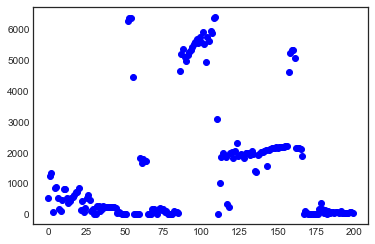

In [93]:
plt.plot(data["Producer Bottom Hole Pressure"].values[:1399:7], 'bo', label = 'PBHP')
plt.show()

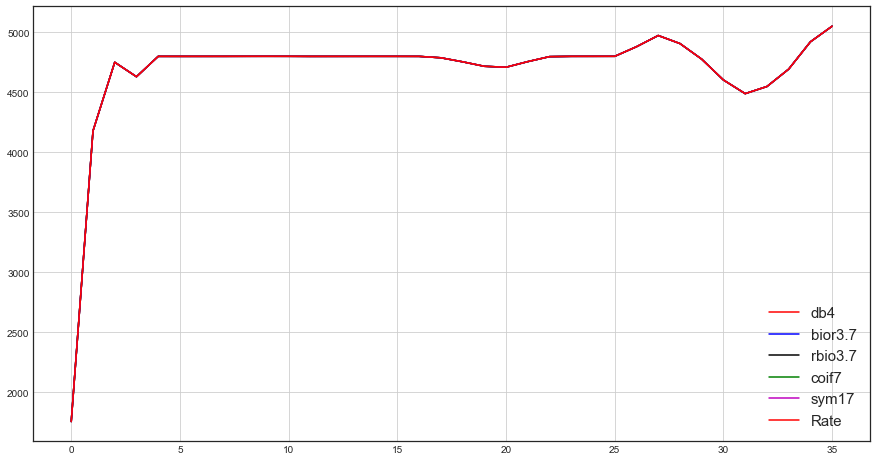

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
db4
36
[1755.96875    4178.19042969 4750.77636719 4630.1640625  4799.83300781
 4799.76855469 4799.84130859 4799.91064453 4800.1484375  4800.29394531
 4800.18115234 4799.63916016 4799.78466797 4799.89160156 4799.99707031
 4799.953125   4799.80615234 4788.15722656 4754.52246094 4717.17382812
 4709.37988281 4756.12402344 4797.70117188 4799.97851562 4800.09375
 4800.29785156 4880.25292969 4973.671875   4906.58398438 4776.5234375
 4602.89892578 4489.19384766 4548.58837891 4693.39599609 4921.13964844
 5051.40429688]


3

In [14]:
def lowpassfilter(signal, thresh, wavelet):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per", level = 0)
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per")
    return reconstructed_signal, coeff

wavelets = ['db4', 'bior3.7', 'rbio3.7', 'coif7', 'sym17']
colors = ['r', 'b', 'k', 'g', 'm']

# wavelets = ['bior3.7']
# colors = ['b']
all_wavelets_reconstructed_signal = []
all_coeff = []
#  {'b' = blue, 'g' = green, 'r' = red, 'c' = cyan, 'm' = magenta, 'y' = yellow, 'k' = black} = colors

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
all_MSE = []
all_r2_score = []
plt.figure(figsize=(15,8))
for wavelet, color in zip(wavelets, colors):
    reconstructed_signal, coeff = lowpassfilter(data["Injector Bottom Hole Pressure"].values[:36], 0.5, wavelet)
    MSE = mean_squared_error(data["Injector Bottom Hole Pressure"].values[:36], reconstructed_signal[:36])
    r_squared = r2_score(data["ESP Current"].values[:36], reconstructed_signal[:36])
    all_MSE.append(MSE)
    all_r2_score.append(r_squared)
    all_wavelets_reconstructed_signal.append(reconstructed_signal)
    all_coeff.append(coeff)
    plt.plot(reconstructed_signal[:36], color, label = wavelet, linewidth=1.5)
plt.plot(data["Injector Bottom Hole Pressure"].values[:36], 'r', label = 'Rate')
plt.grid()
plt.legend(loc='best', prop={'size': 15})
plt.show()

print(all_MSE)
print(all_r2_score)
print(wavelets[np.argmax(all_r2_score)])
print(len(all_coeff[2][0]))
print(all_coeff[3][0])
x = np.array([[[0,1,2],[0,1,2]],[[0,1,2],[0,1,2]]])
y = x[0]
y.shape[1]

array([1755.96875   , 4178.19042969, 4750.77636719, 4630.1640625 ,
       4799.83300781, 4799.76855469, 4799.84130859, 4799.91064453,
       4800.1484375 , 4800.29394531, 4800.18115234, 4799.63916016,
       4799.78466797, 4799.89160156, 4799.99707031, 4799.953125  ,
       4799.80615234, 4788.15722656, 4754.52246094, 4717.17382812,
       4709.37988281, 4756.12402344, 4797.70117188, 4799.97851562,
       4800.09375   , 4800.29785156, 4880.25292969, 4973.671875  ,
       4906.58398438, 4776.5234375 , 4602.89892578, 4489.19384766,
       4548.58837891, 4693.39599609, 4921.13964844, 5051.40429688])

In [197]:
a = []
b = [1, 2]
a = a+b
a = a + [2]

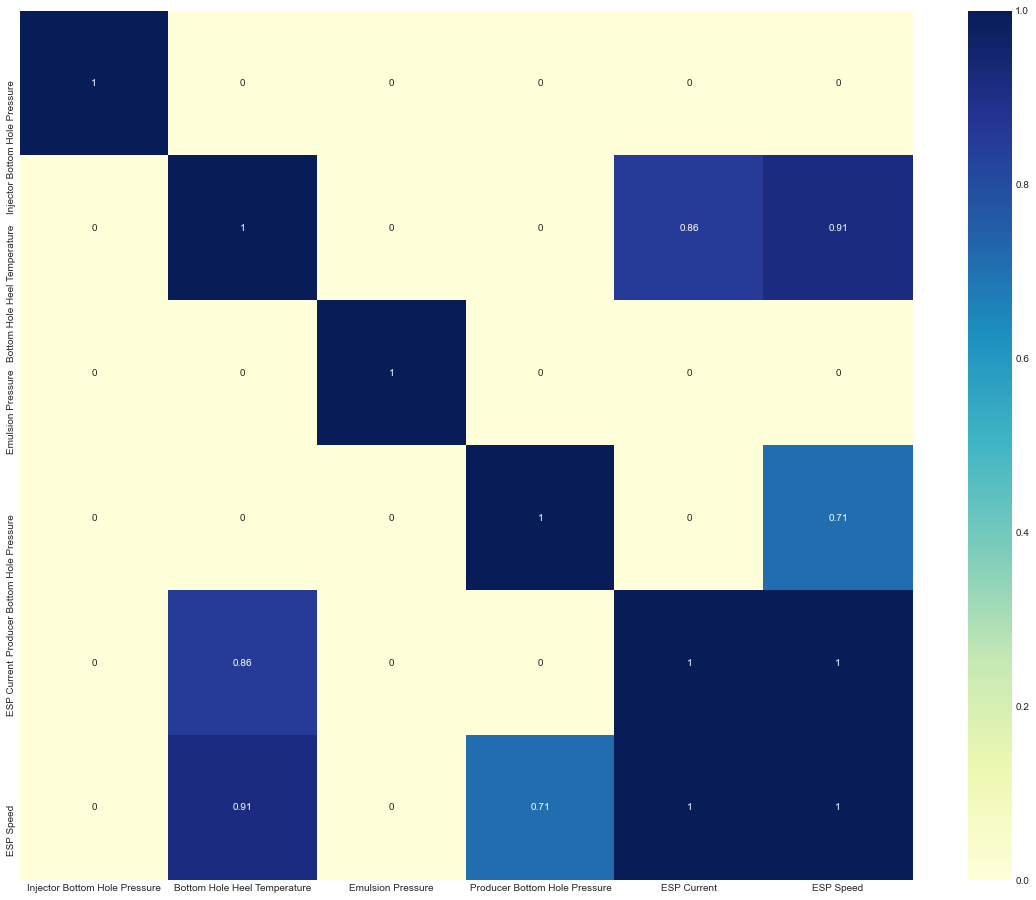

In [128]:
plt.figure(figsize=(20,16))
corr_matrix = data_daily.corr()
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [104]:
data_medianfill = data.fillna(data.median())

data_rollingmeanfill = data.fillna(data.rolling(7, min_periods=1).mean())
data_rollingmeanfill = data_rollingmeanfill.fillna(data_rollingmeanfill.mean())

data_rollingmedianfill = data.fillna(data.rolling(30, min_periods=1).median())
data_rollingmedianfill = data_rollingmedianfill.fillna(data_rollingmedianfill.median())
data_rollingmedianfill.head(50)

,Gas Co-Injection,Injector Bottom Hole Pressure,Steam Flow Rate - Outer,Bottom Hole Heel Temperature,Emulsion Pressure,Producer Bottom Hole Pressure,Pump ESP Speed,Emulsion Flow Rate,Oil Production,Water Production
Date,,,,,,,,,,
2015-01-11,0,2495.888672,258.276733,215.018112,2608.093262,2212.887207,45.148521,417.099518,43.83,99.70
2015-01-12,0,2495.888672,249.286560,212.788620,2592.183838,2217.217773,45.148521,434.335846,138.12,212.46
2015-01-13,0,2495.888672,248.120834,212.102615,2576.625732,2226.160645,45.148521,439.943878,138.42,213.32
2015-01-14,0,2495.888672,251.902237,214.503616,2285.242188,2230.947998,45.148521,420.598206,138.13,212.26
2015-01-15,0,2495.888672,250.346161,214.289246,2381.629150,2221.874268,45.148521,443.032257,135.16,204.48
2015-01-16,0,2500.161377,250.346161,212.016861,2557.583984,2230.847168,45.148521,449.918243,136.33,206.80
2015-01-17,0,2500.161377,250.849182,214.289246,2020.575806,2230.841064,45.148521,415.524658,142.46,211.06
2015-01-18,0,2500.161377,251.902237,214.717987,2499.016602,2235.971924,45.148521,430.153656,135.03,199.88
2015-01-19,0,2500.161377,247.612320,213.002991,2616.151367,2235.964355,45.148521,434.963593,134.12,199.26


In [ ]:
columns_list = ['Steam Flow Rate - Inner',
                'Steam Flow Rate - Outer',
                'Emulsion Flow Rate',
                'Oil Production',
                'Water Production']

for column in columns_list:
    for i in np.arange(len(data_rollingmedianfill)):
        if float(data_rollingmedianfill.loc[i, 'Pump ESP Speed']) = 0:
            float(data_rollingmedianfill.loc[i+1, column]) = 
data_Time

In [75]:
data_rollingmedianfill.isna().sum()

Gas Co-Injection                  0
Injector Bottom Hole Pressure     0
Steam Flow Rate - Outer           0
Bottom Hole Heel Temperature      0
Emulsion Pressure                38
Producer Bottom Hole Pressure     0
Pump ESP Speed                    0
Emulsion Flow Rate               35
Oil Production                    1
Water Production                  1
dtype: int64

In [102]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [103]:
df.fillna(df.rolling(2, min_periods=1).median())

,B
0,0.0
1,1.0
2,2.0
3,2.0
4,4.0


In [110]:
len(monthly_rollingmedianfill)

111

In [111]:
np.min([1,3])

1

In [120]:
x = np.array([[1,2],[3,4]])

for y in x:
    print(y)


[1 2]
[3 4]


In [119]:
print(x[0])

[1 2]
